In [2]:
import urllib.request
import json
import pandas as pd
import bs4
import numpy as np

In [126]:
response = urllib.request.urlopen('http://www.burgerking.co.kr/api/store/searchmap/empty/?areacd=')
bgk_data = json.loads(response.read().decode('utf-8'))
bgk_tbl = pd.DataFrame(bgk_data)
bgk_tbl.head()

,AllHour,CloseCleaning,ClosePeakSeason,CloseWeekday,Delivery,DriveThrough,Morning,NewAddr,NewAddr2,OpenTime,PhoneNumber,PointX,PointY,StoreNM,StoreSQ
0,N,,,22:00,Y,N,N,서울특별시 금천구 가산디지털1로,168 우림라이온스밸리 A동,09:00,02-853-0332,37.480896,126.882133,가산디지털점,1
1,N,,,22:00,Y,N,Y,서울특별시 금천구 디지털로9길 46,이앤씨드림타워7차 101호,08:00,070-7438-8601,37.480247,126.886978,가산이앤씨7점,325
2,N,,/ 토: 10:00 ~ 23:00 / 일: 10:00 ~ 22:00,22:00 / 금: 11:00~23:00,N,N,N,서울특별시 금천구 디지털로10길,9 HYHILL 6층,월~목: 11:00,02-2136-9962,37.477620,126.889053,가산현대시티아울렛점,2
3,N,,,22:00,N,N,N,서울특별시 강서구 양천로,559 이마트3층 (가양동),10:00,02-3664-0221,37.558193,126.861816,가양이마트점,3
4,N,,,23:00,Y,N,N,서울특별시 서대문구 북가좌동,487 성공타워 1층,09:00,02-303-0392,37.570650,126.912750,가재울뉴타운점,275


In [127]:
bgk_locs = pd.DataFrame(bgk_tbl['NewAddr'].apply(lambda v: v.split()[:2]).tolist(),
                        columns=('d1', 'd2'))
bgk_locs.head()

,d1,d2
0,서울특별시,금천구
1,서울특별시,금천구
2,서울특별시,금천구
3,서울특별시,강서구
4,서울특별시,서대문구


In [128]:
bgk_locs['d1'].unique()

array(['서울특별시', '서울시', '경기도', '인천시', '경상남도', '인천광역시', '인천', '강원도', '충청남도',
       '충남', '세종특별자치시', '대전광역시', '대전시', '충청북도', '부산광역시', '부산시', '부산',
       '울산광역시', '대구광역시', '경상북도', '경남', '전라남도', '광주광역시', '전라북도', '전주시',
       '전북', '제주특별자치도'], dtype=object)

In [129]:
d1_aliases = """서울시:서울특별시 충남:충청남도 강원:강원도 경기:경기도 충북:충청북도 경남:경상남도 경북:경상북도
전남:전라남도 전북:전라북도 제주도:제주특별자치도 제주:제주특별자치도 대전시:대전광역시 대구시:대구광역시 인천:인천광역시
광주시:광주광역시 울산시:울산광역시 부산시:부산광역시 부산:부산광역시 인천시:인천광역시"""
d1_aliases = dict(aliasset.split(':') for aliasset in d1_aliases.split())
bgk_locs['d1'] = bgk_locs['d1'].apply(lambda v: d1_aliases.get(v, v))

In [130]:
bgk_locs[bgk_locs['d1'] == '전주시']

,d1,d2
341,전주시,덕진구


In [131]:
bgk_locs.iloc[341] = ['전라북도', '전주시']

In [132]:
bgk_locs[bgk_locs['d1'] == '세종특별자치시']

,d1,d2
210,세종특별자치시,보듬5로
232,세종특별자치시,한누리대로
233,세종특별자치시,None


In [133]:
bgk_locs.iloc[210] = ['충청남도', '세종시']
bgk_locs.iloc[232] = ['충청남도', '세종시']
bgk_locs.iloc[233] = ['충청남도', '세종시']

In [134]:
bgk_locs['d2'].unique()

array(['금천구', '강서구', '서대문구', '서초구', '강남구', '구로구', '송파구', '광진구', '성북구',
       '마포구', '노원구', '관악구', '용산구', '강동구', '동작구', '영등포구', '중구', '중랑구',
       '양천구', '강북구', '은평구', '안산시', '동대문구', '도봉구', '성동구', '서구', '종로구',
       '진주시', '양평군', '고양시', '과천시', '수원시', '광명시', '광주시', '구리시', '파주시',
       '김포시', '남양주시', '동두천시', '화성시', '부천시', '성남시', '군포시', '용인시', '시흥시',
       '안양시', '양주시', '오산시', '의정부시', '이천시', '평택시', '하남시', '남구', '부평구',
       '송도국제대로', '계양구', '남동구', '연수구', '강릉시', '홍천군', '속초시', '원주시', '춘천시',
       '당진시', '서산시', '천안시', '세종시', '홍성군', '유성구', '동구', '청주시', '청원군',
       '진천군', '충주시', '금정구', '사하구', '연제구', '사상구', '해운대구', '동래구', '부산진구',
       '기장군', '수성구', '북구', '달서구', '달성군', '안동시', '상주시', '영주시', '경산시',
       '경주시', '구미시', '김천시', '포항시', '거제시', '창원시', '사천시', '김해시', '양산시',
       '광양시', '나주시', '목포시', '순천시', '여수시', '무안군', '광산구', '군산시', '익산시',
       '전주시', '정읍시', '제주시'], dtype=object)

In [135]:
bgk_locs[bgk_locs['d2'] == '송도국제대로']

,d1,d2
182,인천광역시,송도국제대로


In [136]:
bgk_locs.iloc[182] = ['인천광역시', '연수구']

In [137]:
B = bgk_locs.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
B.head()

경기도 수원시      13
서울특별시 강남구    13
경기도 성남시       8
서울특별시 중구      8
경기도 고양시       7
dtype: int64

In [138]:
MCDONALDS_URL = 'http://www.mcdonalds.co.kr/www/kor/findus/district.do?sSearch_yn=Y&skey=2&pageIndex={page}&skeyword={location}'

In [139]:
def search_mcdonalds_stores_one_page(location, page):
    response = urllib.request.urlopen(
        MCDONALDS_URL.format(location=urllib.parse.quote(location.encode('utf-8')), page=page))
    mcd_data = response.read().decode('utf-8')
    soup = bs4.BeautifulSoup(mcd_data)
    
    ret = []
    for storetag in soup.findAll('dl', attrs={'class': 'clearFix'}):
        storename = storetag.findAll('a')[0].contents[-1].strip()
        storeaddr = storetag.findAll('dd', attrs={'class': 'road'})[0].contents[0].split(']')[1]
        storeaddr_district = storeaddr.split()[:2]
        ret.append([storename] + storeaddr_district)

    return pd.DataFrame(ret, columns=('store', 'd1', 'd2')) if ret else None

In [140]:
def search_mcdonalds_stores(location):
    from itertools import count
    
    found = []
    for pg in count():
        foundinpage = search_mcdonalds_stores_one_page(location, pg+1)
        if foundinpage is None:
            break
        found.append(foundinpage)

    return pd.concat(found)

In [141]:
search_mcdonalds_stores('서울특별시').head()

,store,d1,d2
0,가락DT점,서울특별시,송파구
1,가산디지털점,서울특별시,금천구
2,가산비지니스센터점,서울특별시,금천구
3,강남2호점,서울특별시,강남구
4,강남구청점,서울특별시,강남구


In [314]:
found = []
for distr in bgk_locs['d1'].unique():
    print("processing-->",distr)
    found.append(search_mcdonalds_stores(distr))
mcd_tbl = pd.concat(found)

processing--> 서울특별시
processing--> 경기도
processing--> 인천광역시
processing--> 경상남도
processing--> 강원도
processing--> 충청남도
processing--> 대전광역시
processing--> 충청북도
processing--> 부산광역시
processing--> 울산광역시
processing--> 대구광역시
processing--> 경상북도
processing--> 전라남도
processing--> 광주광역시
processing--> 전라북도
processing--> 제주특별자치도


In [315]:
mcd_tbl['store'].value_counts().head()

파리공원점      1
이마트 만촌점    1
신내점        1
동판교점       1
동아대점       1
Name: store, dtype: int64

In [320]:
mcd_tbl.head()

,store,d1,d2
0,가락DT점,서울특별시,송파구
1,가산디지털점,서울특별시,금천구
2,가산비지니스센터점,서울특별시,금천구
3,강남2호점,서울특별시,강남구
4,강남구청점,서울특별시,강남구


In [322]:
mcd_tbl[mcd_tbl['d2']=="광역시"] = ["부산동명대DT점", "부산광역시", "남구"]

ValueError: cannot set using a list-like indexer with a different length than the value

In [321]:
mcd_tbl.iloc[0] = ["부산동명대DT점", "부산광역시", "남구"]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [301]:
M = mcd_tbl.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
M.head()

경기도 수원시      13
경상남도 창원시     11
서울특별시 강남구    10
경기도 용인시       9
경기도 고양시       9
dtype: int64

In [145]:
def kfc_search_stores_in_dist(num):
    KFC_DISTSEARCH_URL = 'https://www.kfckorea.com/store/findStore/{code}'
    response = urllib.request.urlopen(KFC_DISTSEARCH_URL.format(code=num))
    kfc_data = response.read().decode('utf-8')
    soup = bs4.BeautifulSoup(kfc_data)
    store_name_idx = soup.findAll('script')[-3].text.find("store_name\":\"")
    store_add_idx = soup.findAll('script')[-3].text.find("old_address\":\"")
    
    store_name = soup.findAll('script')[-3].text[store_name_idx+13:].split("\"")[0]
    store_add = soup.findAll('script')[-3].text[store_add_idx+14:].split("\"")[0]
    if len(store_name) < 10:
        return store_name, store_add
    else:
        return None, None

In [146]:
kfc_list = []
count = 0
for i in range(1001, 2101): 
    if i%100 == 0:
        print("processing store code ~", i, " / count : ", count)
        count = 0
    loc1, loc2 = kfc_search_stores_in_dist(i)
    if loc1 != None:
        # print("name-", loc1, "/ address-",loc2.split()[0], "-", loc2.split()[1], end = " ")
        kfc_list.append([loc1, loc2.split()[0], loc2.split()[1]])
        count += 1
        
print(len(kfc_list))

processing store code ~ 1100  / count :  37
processing store code ~ 1200  / count :  92
processing store code ~ 1300  / count :  52
processing store code ~ 1400  / count :  1
processing store code ~ 1500  / count :  3
processing store code ~ 1600  / count :  0
processing store code ~ 1700  / count :  0
processing store code ~ 1800  / count :  4
processing store code ~ 1900  / count :  3
processing store code ~ 2000  / count :  0
processing store code ~ 2100  / count :  4
196


In [147]:
print(len(kfc_list))
kfc_tbl = pd.DataFrame(kfc_list, columns=('store', 'd1', 'd2'))

196


In [148]:
kfc_tbl['d1'].unique()

array(['서울', '인천', '경북', '경기', '부산', '광주', '경남', '대구', '대전', '전남',
       '제주특별자치도', '세종특별자치시', '충남', '울산', '강원', '전북', '충북'], dtype=object)

In [149]:
kfc_tbl[kfc_tbl['d1']=="세종특별자치시"]

,store,d1,d2
83,세종이마트,세종특별자치시,가람동


In [150]:
kfc_tbl.iloc[83] = ["세종이마트", "충청남도", "세종시"]

In [151]:
d1_aliases = """서울:서울특별시 인천:인천광역시 강원:강원도 경기:경기도 충남:충청남도 충북:충청북도 경남:경상남도 경북:경상북도
전남:전라남도 전북:전라북도 대전:대전광역시 대구:대구광역시 광주:광주광역시 울산:울산광역시 부산:부산광역시"""
d1_aliases = dict(aliasset.split(':') for aliasset in d1_aliases.split())
kfc_tbl['d1'] = kfc_tbl['d1'].apply(lambda v: d1_aliases.get(v, v))

In [152]:
K = kfc_tbl.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
K.head()

서울특별시 서초구    10
서울특별시 강남구     7
경기도 수원시       6
경기도 성남시       6
서울특별시 송파구     5
dtype: int64

In [302]:
BMK = pd.DataFrame({'B': B, 'M': M, 'K': K}).fillna(0)
BMK['total'] = BMK.sum(axis=1)
BMK = BMK.sort_values(by=['total'], ascending=False)
BMK.head(10)

,B,M,K,total
경기도 수원시,13.0,13.0,6.0,32.0
서울특별시 강남구,13.0,10.0,7.0,30.0
서울특별시 서초구,7.0,6.0,10.0,23.0
경기도 성남시,8.0,8.0,6.0,22.0
경상남도 창원시,6.0,11.0,3.0,20.0
경기도 고양시,7.0,9.0,4.0,20.0
경기도 용인시,5.0,9.0,5.0,19.0
서울특별시 송파구,7.0,4.0,5.0,16.0
경기도 부천시,4.0,8.0,3.0,15.0
충청북도 청주시,6.0,6.0,3.0,15.0


In [303]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
rcParams['font.size'] = 12

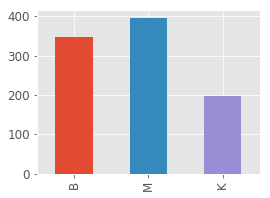

In [304]:
plt.figure(figsize=(4, 3))
BMK.sum(axis=0).iloc[:3].plot(kind='bar')

In [156]:
import scipy.stats

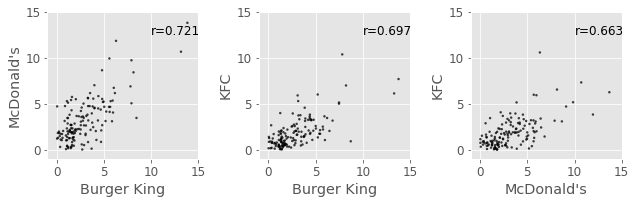

In [157]:
fig = plt.figure(figsize=(9, 3))

def plot_nstores(b1, b2, label1, label2):
    plt.scatter(BMK[b1] + np.random.random(len(BMK)),
                BMK[b2] + np.random.random(len(BMK)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15)
    plt.ylim(-1, 15)
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    r = scipy.stats.pearsonr(BMK[b1], BMK[b2])
    plt.annotate('r={:.3f}'.format(r[0]), (10, 12.5))

ax = fig.add_subplot(1, 3, 1)
plot_nstores('B', 'M', 'Burger King', "McDonald's")

ax = fig.add_subplot(1, 3, 2)
plot_nstores('B', 'K', 'Burger King', 'KFC')

ax = fig.add_subplot(1, 3, 3)
plot_nstores('M', 'K', "McDonald's", 'KFC')

plt.tight_layout()

Text(0, 0.5, 'Cumulative fraction')

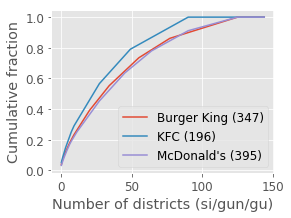

In [158]:
plt.figure(figsize=(4, 3))
for col, label in [('B', 'Burger King'), ('K', 'KFC'), ('M', "McDonald's")]:
    cumulv = np.cumsum(sorted(BMK[col], reverse=True)) / BMK[col].sum()
    plt.plot(cumulv, label='{} ({})'.format(label, int(BMK[col].sum())))
plt.legend(loc='best')
plt.xlabel('Number of districts (si/gun/gu)')
plt.ylabel('Cumulative fraction')

In [4]:
LOTTERIA_URL = 'http://www.lotteria.com/Shop/Shop_Ajax.asp'
LOTTERIA_VALUES = {
    'Page': 1, 'PageSize': 2000, 'BlockSize': 2000,
    'SearchArea1': '', 'SearchArea2': '', 'SearchType': "TEXT",
    'SearchText': '', 'SearchIs24H': '', 'SearchIsWifi': '',
    'SearchIsDT': '', 'SearchIsHomeService': '', 'SearchIsGroupOrder': '',
    'SearchIsEvent': ''}
LOTTERIA_HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:12.0) Gecko/20100101',
    'Host': 'www.lotteria.com',
    'Accept': 'text/html, */*; q=0.01',
    'Accept-Language': 'en-us,en;q=0.5',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Referer': 'http://www.lotteria.com/Shop/Shop_List.asp?Page=1&PageSize=2000&BlockSize=2000&Se'
               'archArea1=&SearchArea2=&SearchType=TEXT&SearchText=&SearchIs24H=&SearchIsWifi=&Se'
               'archIsDT=&SearchIsHomeService=&SearchIsGroupOrder=&SearchIsEvent=',
}

In [5]:
postdata = urllib.parse.urlencode(LOTTERIA_VALUES).encode('utf-8')
req = urllib.request.Request(LOTTERIA_URL, postdata, LOTTERIA_HEADERS)
response = urllib.request.urlopen(req)
ltr_data = response.read().decode('utf-8')
soup = bs4.BeautifulSoup(ltr_data)

In [8]:
found = []
for tag in soup.findAll('tr', {'class': 'shopSearch'}):
    subtag = tag.findAll('td', {'style': 'padding-right:10px;'})
    for sub in subtag:
        st_name = sub.text.replace("D/T", "DT")
        st_name = st_name.replace("D/I","DI")
        st_name = st_name.replace("(상)","")
        st_name = st_name.replace("(하)","")
        found.append(st_name)

for n in range(len(found)):
    print(n+1, found[n], end=" / ")

1 롯데마트영통 / 2 구미산동 / 3 미사역 / 4 진해자은 / 5 수원고색 / 6 전북진안 / 7 동탄주거단지 / 8 안성중앙대 / 9 영남대DT / 10 홈플러스중계 / 11 광교 / 12 롯데마트중계 / 13 가평설악 / 14 부산괴정 / 15 경남대 / 16 양수리 / 17 서산해미 / 18 서산테크노밸리 / 19 하나로제주성산 / 20 파주야당역 / 21 홈플러스서부산 / 22 밀양하남 / 23 인천도화 / 24 광주퇴촌 / 25 여수예술랜드 / 26 용인남사 / 27 장생포 / 28 용인송전 / 29 왕십리역사 / 30 화곡역 / 31 홈플러스울산남구 / 32 파주광탄 / 33 부산서동 / 34 인천가정 / 35 순천조례 / 36 롯데마트동래 / 37 서충주신도시 / 38 대전세이 / 39 밀양삼문 / 40 방배역 / 41 안동문화의거리 / 42 경북의성 / 43 오남어람 / 44 전남곡성 / 45 해운대DT / 46 강남일원 / 47 금정역 / 48 제주우도 / 49 서면지하상가 / 50 경북신영주 / 51 음성삼성 / 52 여수죽림 / 53 원주흥업 / 54 동탄CGV / 55 창천 / 56 김포국제공항국내선청사4F / 57 부산연지 / 58 평택세교 / 59 평택진위DT / 60 청주옥산 / 61 춘천장학 / 62 시흥현대시장 / 63 인천공항제2여객터미널3층 / 64 부산광안역 / 65 인천공항제2여객터미널1층 / 66 위례중앙 / 67 구리갈매 / 68 당진기지시 / 69 포항법원 / 70 순천용당 / 71 울산삼산DI / 72 구미신평DT / 73 보라매타운 / 74 진해남문 / 75 시흥휴게소 / 76 청량리역사 / 77 롯데아울렛고양 / 78 용인시청DT / 79 전북장수 / 80 목동킴스클럽 / 81 롯데마트김포한강신도시 / 82 부산지사 / 83 경주보문 / 84 벌교 / 85 용인백암 / 86 울릉도 / 87 마곡나루역 / 88 대전도안 / 89 롯데속초리조트 / 90 의정부휴게소 / 91 내린천휴게소 / 92 별내휴게소 / 9

 부산경성대 / 802 롯데마트전주 / 803 롯데마트당진 / 804 홈플러스평촌 / 805 동대문광장 / 806 롯데마트대전노은 / 807 태백 / 808 구미양포 / 809 홈플러스오창 / 810 송악 / 811 홈플러스문경 / 812 장승포 / 813 홈플러스서대전 / 814 수원북문 / 815 홈플러스천안 / 816 홈플러스울산동구 / 817 해운대세이브존 / 818 화성봉담 / 819 동해 / 820 다산 / 821 성신여대 / 822 홈플러스진해 / 823 롯데마트시티세븐 / 824 충주터미널 / 825 홈플러스조치원 / 826 포항대흥 / 827 수원성대 / 828 광주치평점 / 829 영덕 / 830 칠곡석적 / 831 홈플러스상인 / 832 홈플러스계산 / 833 홈플러스목포B1 / 834 화성동탄 / 835 구미상모 / 836 롯데슈광주첨단 / 837 롯데마인천삼산B1 / 838 용인상현 / 839 원통 / 840 평촌주공공이 / 841 롯데마트대덕테크노밸리 / 842 인천가좌 / 843 동대문역사문화공원역 / 844 전주터미널 / 845 청주산남 / 846 신당역 / 847 홈플러스전주 / 848 신림역 / 849 홈플러스보령 / 850 원광대 / 851 진주갤러리아 / 852 천안직산 / 853 홈플러스해운대 / 854 청량리 / 855 울산구영 / 856 화성기안 / 857 대전가오 / 858 부천역 / 859 부천역EXP / 860 올림픽공원 / 861 광명 / 862 부산사상 / 863 노량진 / 864 순천풍덕 / 865 홈플러스장림 / 866 용인구성 / 867 인천만수 / 868 대전전민 / 869 홈플러스울산북구 / 870 호평 / 871 의정부제일 / 872 고창 / 873 홈플러스천안신방 / 874 건대스타시티 / 875 롯데마트군산 / 876 파주교하 / 877 인천석남 / 878 롯데마트광주월드컵 / 879 광주문흥 / 880 홈플러스방학 / 881 롯데마트부평 / 882 조치원 / 883 천안역사 / 884 롯데마트목

In [7]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org selenium

In [9]:
from selenium import webdriver

In [10]:
driver = webdriver.Chrome('./driver/chromedriver')
driver.get("https://map.naver.com/")

In [11]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [12]:
# naver map
ltr_list = []
count = 1
for name in found:
    if count%100 == 0:
        print(count,"번째")
    count += 1
    
    driver.get("https://map.naver.com/")
    try:
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "search-input"))
        )
    finally:
        pass
    
    str = "롯데리아 " + name + "점"
    driver.find_element_by_id('search-input').clear()
    driver.find_element_by_id('search-input').send_keys(str)
    element = driver.find_element_by_xpath("""//*[@type="submit"]""")
    driver.execute_script("arguments[0].click();", element)
    
    try:
        element = WebDriverWait(driver, 3).until(
            EC.presence_of_element_located((By.CLASS_NAME, "lsnx"))
        )
        html = driver.page_source
        soup = bs4.BeautifulSoup(html, 'html.parser')
        ultag = soup.find("ul", "lst_site")
        real_name = ultag.find("dt").find("a").text
        addr = ultag.find("dd", "addr").text
        ltr_list.append([name, real_name, addr.split()[0], addr.split()[1]])
    except:
        print(name, end=" / ")
        ltr_list.append([name, None, None, None])
        
    finally:
        pass
print("Fin")

롯데마트영통 / 여수예술랜드 / 대전세이 / 인천공항제2여객터미널3층 / 롯데마트김포한강신도시 / 경주보문 / 롯데마트시흥배곧 / 100 번째
하나로고양 / 신부산역사 / 잠실야구장1층 / 잠실야구장2층 / 잠실야구장3층 / 백령도 / 롯데백창원식품관 / 원주혁신도시 / 수서역사 / 안성휴게소 / 안성맞춤휴게소 / 안성맞춤휴게소 / 죽암휴게소DT / 전주하가DI / 오창2산단 / 현풍테크노폴리스 / 부산키자니아 / 200 번째
용인휴게소 / 패션아일랜드대전 / 롯데이천아울렛 / 300 번째
동대구역사2호 / 화성사강DT / 400 번째
인천허브DI / 순천향대학DT / 투나송내 / 원마운트워터파크 / 안산반월 / 롯데안양 / 송산휴게소 / 홈플러스포천송우 / 홈플러스동광주 / 안양박달DI / 500 번째
롯데마트시흥 / 서산휴게소(下) / 홈플러스유성 / 안양관양 / 빅마켓금천 / 600 번째
목동행복한백화점 / 광명역사 / 용산역사ST / 길음뉴타운점 / 700 번째
성남단대 / 부천뉴코아 / 전주동산 / 대전괴정ST / 800 번째
해운대세이브존 / 신당역 / 경산롯데씨네마 / 900 번째
의정부가능역점 / 동아쇼핑반월당 / 의정부금오 / 포항두호 / 1000 번째
1100 번째
홈플러스영통 / 1200 번째
영천시장 / 성남양지 / 1300 번째
잠실아이스링크 / 서울랜드점 / 홈서비스과천 / 홈서비스부암(부산역) / 홈서비스성황 / Fin


In [88]:
# kakao map
ltr_list = []
count = 1
for name in found:
    if count%100 == 0:
        print(count,"번째")
    count += 1
    
    str = "https://map.kakao.com/?q=롯데리아 " + name + "점"
    driver.get(str)
    
    element = WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.ID, "info.search.place.list"))
    )
    html = driver.page_source
    soup = bs4.BeautifulSoup(html, 'html.parser')
    ultag = soup.find("ul", {"id": "info.search.place.list"})
    real_name = ultag.find("a", {"data-id": "name"}).text
    addr = ultag.find("p", {"data-id": "address"}).text
    ltr_list.append([name, real_name.replace("롯데리아", "").lstrip(), addr.split()[0], addr.split()[1]])
    
print("Fin")

AttributeError: 'NoneType' object has no attribute 'text'

In [72]:
len(ltr_list)

1341

In [71]:
ltr_tbl = pd.DataFrame(ltr_list, columns=('store', 'realname', 'd1', 'd2'))

In [27]:
ltr_tbl.to_excel('lotteria.xlsx', sheet_name='sheet1')

In [75]:
ltr_tbl[ltr_tbl['d1'].isnull()]

,store,realname,d1,d2


In [74]:
ltr_tbl.iloc[0] = ["롯데마트영통", None, "경기도", "수원시"]
ltr_tbl.iloc[24] = ["여수예술랜드", None, "전라북도", "여수시"]
ltr_tbl.iloc[37] = ["대전세이", None, "대전광역시", "중구"]
ltr_tbl.iloc[62] = ["인천공항제2여객터미널3층", None, "인천광역시", "중구"]
ltr_tbl.iloc[80] = ["롯데마트김포한강신도시", None, "경기도", "김포시"]
ltr_tbl.iloc[82] = ["경주보문", None, "경상북도", "경주시"]
ltr_tbl.iloc[94] = ["롯데마트시흥배곧", None, "경기도", "시흥시"]
ltr_tbl.iloc[101] = ["하나로고양", None, "경기도", "고양시"]
ltr_tbl.iloc[108] = ["신부산역사", None, "부산광역시", "동구"]
ltr_tbl.iloc[116] = ["잠실야구장1층", None, "서울특별시", "송파구"]
ltr_tbl.iloc[117] = ["잠실야구장2층", None, "서울특별시", "송파구"]
ltr_tbl.iloc[118] = ["잠실야구장3층", None, "서울특별시", "송파구"]
ltr_tbl.iloc[119] = ["백령도", None, "인천광역시", "옹진군"]
ltr_tbl.iloc[123] = ["롯데백창원식품관", None, "경상남도", "창원시"]
ltr_tbl.iloc[127] = ["원주혁신도시", None, "강원도", "원주시"]
ltr_tbl.iloc[148] = ["수서역사", None, "서울특별시", "강남구"]
ltr_tbl.iloc[155] = ["안성휴게소", None, "경기도", "안성시"]
ltr_tbl.iloc[167] = ["안성맞춤휴게소", None, "경기도", "안성시"]
ltr_tbl.iloc[168] = ["안성맞춤휴게소", None, "경기도", "안성시"]
ltr_tbl.iloc[169] = ["죽암휴게소DT", None, "충청북도", "청주시"]
ltr_tbl.iloc[177] = ["전주하가DI", None, "전라북도", "전주시"]
ltr_tbl.iloc[181] = ["오창2산단", None, "충청북도", "청주시"]
ltr_tbl.iloc[185] = ["현풍테크노폴리스", None, "대구광역시", "달성군"]
ltr_tbl.iloc[194] = ["부산키자니아", None, "부산광역시", "해운대구"]
ltr_tbl.iloc[236] = ["용인휴게소", None, "경기도", "용인시"]
ltr_tbl.iloc[237] = ["패션아일랜드대전", None, "대전광역시", "동구"]
ltr_tbl.iloc[263] = ["롯데이천아울렛", None, "경기도", "이천시"]
ltr_tbl.iloc[385] = ["동대구역사2호", None, "대구광역시", "동구"]
ltr_tbl.iloc[389] = ["화성사강DT", None, "경기도", "화성시"]
ltr_tbl.iloc[415] = ["인천허브DI", None, "인천광역시", "중구"]
ltr_tbl.iloc[418] = ["순천향대학DT", None, "충청남도", "아산시"]
ltr_tbl.iloc[428] = ["투나송내", None, "경기도", "부천시"]
ltr_tbl.iloc[458] = ["원마운트워터파크", None, "경기도", "고양시"]
ltr_tbl.iloc[464] = ["안산반월", None, "경기도", "안산시"]
ltr_tbl.iloc[465] = ["롯데안양", None, "경기도", "안양시"]
ltr_tbl.iloc[467] = ["송산휴게소", None, "경기도", "화성시"]
ltr_tbl.iloc[468] = ["홈플러스포천송우", None, "경기도", "포천시"]
ltr_tbl.iloc[487] = ["홈플러스동광주", None, "광주광역시", "북구"]
ltr_tbl.iloc[494] = ["안양박달DI", None, "경기도", "안양시"]
ltr_tbl.iloc[502] = ["롯데마트시흥", None, "경기도", "시흥시"]
ltr_tbl.iloc[508] = ["서산휴게소(下)", None, "충청남도", "서산시"]
ltr_tbl.iloc[512] = ["홈플러스유성", None, "대전광역시", "유성구"]
ltr_tbl.iloc[513] = ["안양관양", None, "경기도", "안양시"]
ltr_tbl.iloc[516] = ["빅마켓금천", None, "서울특별시", "금천구"]
ltr_tbl.iloc[604] = ["목동행복한백화점", None, "서울특별시", "양천구"]
ltr_tbl.iloc[653] = ["광명역사", None, "경기도", "광명시"]
ltr_tbl.iloc[663] = ["용산역사ST", None, "서울특별시", "용산구"]
ltr_tbl.iloc[671] = ["길음뉴타운점", None, "서울특별시", "성북구"]
ltr_tbl.iloc[746] = ["성남단대", None, "경기도", "성남시"]
ltr_tbl.iloc[755] = ["부천뉴코아", None, "경기도", "부천시"]
ltr_tbl.iloc[767] = ["전주동산", None, "전라북도", "전주시"]
ltr_tbl.iloc[785] = ["대전괴정DT", None, "대전광역시", "서구"]
ltr_tbl.iloc[816] = ["해운대세이브존", None, "부산광역시", "해운대구"]
ltr_tbl.iloc[845] = ["신당역", None, "서울특별시", "중구"]
ltr_tbl.iloc[893] = ["경산롯데씨네마", None, "경상북도", "경산시"]
ltr_tbl.iloc[918] = ["의정부가능역점", None, "경기도", "의정부시"]
ltr_tbl.iloc[936] = ["동아쇼핑반월당", None, "대구광역시", "중구"]
ltr_tbl.iloc[980] = ["의정보금오", None, "경기도", "의정부시"]
ltr_tbl.iloc[993] = ["포항두호", None, "경상북도", "포항시"]
ltr_tbl.iloc[1143] = ["홈플러스영통", None, "경기도", "수원시"]
ltr_tbl.iloc[1240] = ["영천시장", None, "서울특별시", "서대문구"]
ltr_tbl.iloc[1267] = ["성남양지", None, "경기도", "성남시"]
ltr_tbl.iloc[1328] = ["잠실아이스링크", None, "서울특별시", "송파구"]
ltr_tbl.iloc[1329] = ["서울랜드점", None, "경기도", "과천시"]
ltr_tbl.iloc[1338] = ["홈서비스과천", None, "경기도", "과천시"]
ltr_tbl.iloc[1339] = ["홈서비스부암(부산역)", None, "부산광역시", "부산진구"]
ltr_tbl.iloc[1340] = ["홈서비스성황", None, "충청남도", "천안시"]

ltr_tbl.iloc[5] = ["전북진안", "롯데리아 전북진안점", "전라북도", "진안군"]

In [76]:
ltr_tbl['d1'].unique()

array(['경기도', '경상북도', '경상남도', '전라북도', '서울특별시', '부산광역시', '충청남도', '제주특별자치도',
       '인천광역시', '울산광역시', '전라남도', '충청북도', '대전광역시', '강원도', '광주광역시', '대구광역시',
       '세종특별자치시'], dtype=object)

In [66]:
ltr_tbl[ltr_tbl['d1']=="세종특별자치시"]

,store,realname,d1,d2
189,세종종촌,롯데리아 세종종촌점,세종특별자치시,종촌동
217,세종부강,롯데리아 세종부강점,세종특별자치시,부강면
284,세종첫마을,롯데리아 세종첫마을점,세종특별자치시,나성동
287,홈플러스세종,롯데리아 홈플러스세종점,세종특별자치시,절재로
824,홈플러스조치원,롯데리아 홈플러스조치원점,세종특별자치시,조치원읍
881,조치원,롯데리아 조치원점,세종특별자치시,조치원읍


In [67]:
ltr_tbl.iloc[189] = ["세종종촌", "롯데리아 세종종촌점", "충청북도", "세종시"]
ltr_tbl.iloc[217] = ["세종부강", "롯데리아 세종부강점", "충청북도", "세종시"]
ltr_tbl.iloc[284] = ["세종첫마을", "롯데리아 세종첫마을점", "충청북도", "세종시"]
ltr_tbl.iloc[287] = ["홈플러스세종", "롯데리아 홈플러스세종점", "충청북도", "세종시"]
ltr_tbl.iloc[824] = ["홈플러스조치원", "롯데리아 홈플러스조치원점", "충청북도", "세종시"]
ltr_tbl.iloc[881] = ["조치원", "롯데리아 조치원점", "충청북도", "세종시"]

In [69]:
ltr_tbl['d2'].unique()

array(['수원시', '구미시', '하남시', '창원시', '진안군', '화성시', '안성시', '경산시', '노원구',
       '가평군', '사하구', '양평군', '서산시', '서귀포시', '파주시', '사상구', '밀양시', '미추홀구',
       '광주시', '여수시', '용인시', '남구', '성동구', '강서구', '금정구', '서구', '순천시', '동래구',
       '충주시', '중구', '서초구', '안동시', '의성군', '남양주시', '곡성군', '해운대구', '강남구',
       '군포시', '제주시', '부산진구', '영주시', '음성군', '원주시', '서대문구', '평택시', '청주시',
       '춘천시', '금천구', '수영구', '송파구', '구리시', '당진시', '포항시', '동작구', '시흥시',
       '동대문구', '고양시', '장수군', '양천구', '김포시', '경주시', '보성군', '울릉군', '속초시',
       '의정부시', '인제군', '양주시', '울주군', '광산구', '북구', '영등포구', '동구', '천안시',
       '유성구', '익산시', '옹진군', '전주시', '아산시', '진주시', '이천시', '오산시', '안산시',
       '안양시', '양산시', '중랑구', '은평구', '달성군', '정읍시', '의왕시', '고성군', '세종시',
       '함평군', '성남시', '김천시', '홍성군', '보령시', '무주군', '용산구', '남동구', '연수구',
       '구례군', '거제시', '강북구', '구로구', '관악구', '강릉시', '여주시', '기장군', '나주시',
       '장성군', '수성구', '봉화군', '광명시', '하동군', '성북구', '고령군', '연제구', '고흥군',
       '마포구', '순창군', '부천시', '김해시', '달서구', '논산시', '임실군', '창녕군', '광진구',
       '강

In [77]:
L = ltr_tbl.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
L.head()

경상남도 창원시    34
경기도 수원시     30
충청북도 청주시    29
경기도 고양시     26
경기도 용인시     25
dtype: int64

In [86]:
def moms_search_stores_in_dist(num):
    store_list = []
    MT_DISTSEARCH_URL = 'http://www.momstouch.co.kr/sub/store/store_01_list.html?pg={code}'
    response = urllib.request.urlopen(MT_DISTSEARCH_URL.format(code=num))
    mt_data = response.read()
    soup = bs4.BeautifulSoup(mt_data)
    table = soup.find("table", {"class": "store_List"})
    trs = table.findAll("tr")[1:]
    
    for tr in trs:
        store_name = tr.findAll("td")[1].text
        store_add = tr.find("td", {"class": "td_Left"}).text
        store_list.append([store_name, store_add.split()[0], store_add.split()[1]])
        
    return store_list

In [87]:
moms_list = []
tmp_list = []
for i in range(1, 120): 
    tmp_list = moms_search_stores_in_dist(i)
    moms_list += tmp_list
        
print(len(moms_list))

1188


In [89]:
moms_tbl = pd.DataFrame(moms_list, columns=('store', 'd1', 'd2'))

In [92]:
moms_tbl['d1'].unique()

array(['서울시', '전주시덕진구', '경기도', '충청남도', '제주', '충남', '서울', '경상남도', '서울특별시',
       '세종특별자치시', '충북', '부산시', '대구광역시', '경북', '울산광역시', '전라북도', '부산광역시',
       '선릉로64길', '제주특별자치도', '대전광역시', '경상북도', '전북', '경남', '경기', '인천',
       '충청북도', '광주광역시', '강원도', '전라남도', '광주', '강원', '대구시', '대구', '울산',
       '부산', '대전시', '전남', '대전', '울산시', '고양시', '경기도안산시', '세종시', '세종특별시',
       '제주시', '부산해운대구해운대로', '인천광역시', '세종'], dtype=object)

In [95]:
moms_tbl[moms_tbl['d1']=="전주시덕진구"]

,store,d1,d2


In [94]:
moms_tbl.iloc[1] = ["전주에코시티점", "전라북도", "전주시"]

In [96]:
moms_tbl[moms_tbl['d1']=="선릉로64길"]

,store,d1,d2
30,한티역점,선릉로64길,"11-2,"


In [100]:
moms_tbl.iloc[30] = ["한티역점", "서울특별시", "강남구"]

In [98]:
moms_tbl[moms_tbl['d1']=="경기도안산시"]

,store,d1,d2
249,안산한대역점,경기도안산시,상록구


In [101]:
moms_tbl.iloc[249] = ["안산한대역점", "경기도", "안산시"]

In [102]:
moms_tbl[moms_tbl['d1']=="부산해운대구해운대로"]

,store,d1,d2
824,장산역점,부산해운대구해운대로,814


In [103]:
moms_tbl.iloc[824] = ["장산역점", "부산광역시", "해운대구"]

In [110]:
moms_tbl[moms_tbl['d1']=="고양시"]

,store,d1,d2
220,고양능곡점,고양시,덕양구


In [111]:
moms_tbl.iloc[220] = ["고양능곡점", "경기도", "고양시"]

In [116]:
moms_tbl[moms_tbl['d1']=="제주시"]

,store,d1,d2
783,한라대점,제주시,한라대학로
849,함덕점,제주시,조천읍
896,이도점,제주시,이도2동
898,연삼로점,제주시,연삼로


In [117]:
moms_tbl.iloc[783] = ["한라대점", "제주특별자치도", "제주시"]
moms_tbl.iloc[849] = ["함덕점", "제주특별자치도", "제주시"]
moms_tbl.iloc[896] = ["이도점", "제주특별자치도", "제주시"]
moms_tbl.iloc[898] = ["연삼로점", "제주특별자치도", "제주시"]

In [120]:
moms_tbl['d1'].unique()

array(['서울특별시', '전라북도', '경기도', '충청남도', '제주특별자치도', '경상남도', '세종특별자치시',
       '충청북도', '부산광역시', '대구광역시', '경상북도', '울산광역시', '대전광역시', '인천광역시',
       '광주광역시', '강원도', '전라남도'], dtype=object)

In [119]:
d1_aliases = """서울:서울특별시 서울시:서울특별시 충남:충청남도 강원:강원도 경기:경기도 충북:충청북도 경남:경상남도 경북:경상북도
전남:전라남도 전북:전라북도 제주도:제주특별자치도 제주:제주특별자치도 대전:대전광역시 대전시:대전광역시 대구:대구광역시 대구시:대구광역시 인천:인천광역시
광주:광주광역시 광주시:광주광역시 울산:울산광역시 울산시:울산광역시 부산시:부산광역시 부산:부산광역시 인천시:인천광역시 세종:세종특별자치시 세종시:세종특별자치시 세종특별시:세종특별자치시"""
d1_aliases = dict(aliasset.split(':') for aliasset in d1_aliases.split())
moms_tbl['d1'] = moms_tbl['d1'].apply(lambda v: d1_aliases.get(v, v))

In [121]:
moms_tbl[moms_tbl['d1']=="세종특별자치시"]

,store,d1,d2
18,세종도담점,세종특별자치시,도담동
72,세종대평점,세종특별자치시,시청대로
112,세종국책연구소점,세종특별자치시,시청대로
152,세종새롬점,세종특별자치시,새롬중앙로
259,세종아름점,세종특별자치시,보듬3로
280,세종보람점,세종특별자치시,남세종로
383,세종고운점,세종특별자치시,마음로
432,세종어진점,세종특별자치시,절재로
456,세종cgv점,세종특별자치시,도움1로
558,조치원역점,세종특별자치시,조치원읍


In [368]:
moms_tbl.iloc[18] = ["세종도담점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[72] = ["세종대평점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[112] = ["세종국책연구소점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[152] = ["세종새롬점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[259] = ["세종아름점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[280] = ["세종보람점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[383] = ["세종고운점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[432] = ["세종어진점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[456] = ["세종cgv점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[558] = ["조치원역점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[712] = ["한국영상대점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[900] = ["홍익대세종캠퍼스점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[925] = ["고려대세종캠퍼스점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[1046] = ["신세종첫마을점", "세종특별자치시", "세종특별자치시"]
moms_tbl.iloc[1049] = ["세종부강점", "세종특별자치시", "세종특별자치시"]

In [369]:
MS = moms_tbl.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
MS.head()

경상남도 창원시    29
충청남도 천안시    29
충청북도 청주시    27
경기도 고양시     26
경기도 수원시     22
dtype: int64

In [ ]:
# 크롤링 데이터 저장
B.to_excel('./export/res_burgerking.xlsx', sheet_name='sheet1')
M.to_excel('./export/res_mcdonalds.xlsx', sheet_name='sheet1')
K.to_excel('./export/res_kfc.xlsx', sheet_name='sheet1')
L.to_excel('./export/res_lotteria.xlsx', sheet_name='sheet1')
MS.to_excel('./export/res_momstouch.xlsx', sheet_name='sheet1')

In [3]:
# 저장한 데이터 사용
B = pd.read_excel('./export/res_burgerking.xlsx')
M = pd.read_excel('./export/res_mcdonalds.xlsx')
K = pd.read_excel('./export/res_kfc.xlsx')
L = pd.read_excel('./export/res_lotteria.xlsx')
MS = pd.read_excel('./export/res_momstouch.xlsx')
B.head()

,0
경기도 수원시,13
서울특별시 강남구,13
경기도 성남시,8
서울특별시 중구,8
경기도 고양시,7


In [4]:
BMKLS = pd.DataFrame({'B': B[0], 'M': M[0], 'K': K[0], 'L': L[0], 'MS': MS[0]}).fillna(0)
BMKLS['total'] = BMKLS.sum(axis=1)
BMKLS = BMKLS.sort_values(by=['total'], ascending=False)
BMKLS.head(10)

,B,M,K,L,MS,total
경기도 수원시,13.0,13.0,6.0,30.0,22.0,84.0
경상남도 창원시,6.0,11.0,3.0,34.0,29.0,83.0
경기도 고양시,7.0,9.0,4.0,26.0,26.0,72.0
충청북도 청주시,6.0,6.0,3.0,29.0,27.0,71.0
충청남도 천안시,4.0,5.0,3.0,25.0,29.0,66.0
경기도 용인시,5.0,9.0,5.0,25.0,18.0,62.0
경기도 부천시,4.0,8.0,3.0,18.0,19.0,52.0
전라북도 전주시,6.0,6.0,2.0,21.0,15.0,50.0
경기도 성남시,8.0,8.0,6.0,15.0,11.0,48.0
서울특별시 송파구,7.0,4.0,5.0,23.0,5.0,44.0


In [7]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style

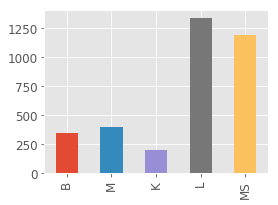

In [8]:
style.use('ggplot')
rcParams['font.size'] = 12
plt.figure(figsize=(4, 3))
BMKLS.sum(axis=0).iloc[:5].plot(kind='bar')

In [13]:
import scipy.stats
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
from matplotlib import rcParams
from matplotlib import cm, colors, _cm
rcParams['font.family'] = 'NanumBarunGothic'

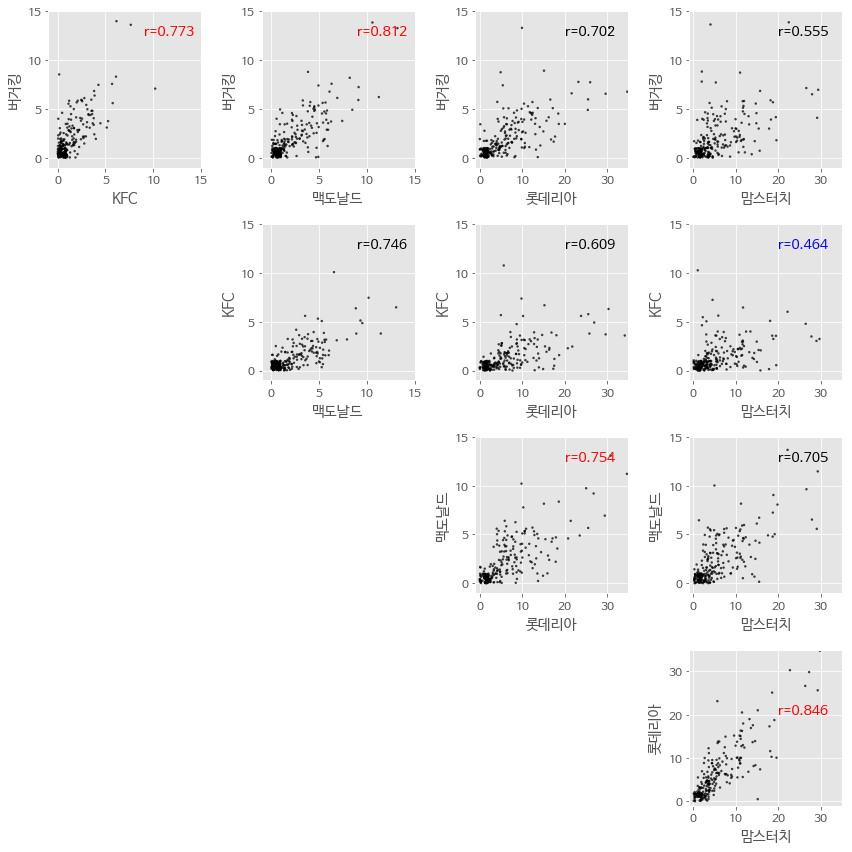

In [14]:
fig = plt.figure(figsize=(12, 12))

def plot_nstores3(b1, b2, label1, label2):
    plt.scatter(BMKLS[b1] + np.random.random(len(BMKLS)),
                BMKLS[b2] + np.random.random(len(BMKLS)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15 if (b1 != 'L') & (b1 != 'MS') else 35)
    plt.ylim(-1, 15 if (b2 != 'L') & (b2 != 'MS') else 35)
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    r = scipy.stats.pearsonr(BMKLS[b1], BMKLS[b2])
    
    if r[0]>=0.75:
        color='red'
    elif r[0]<0.5:
        color='blue'
    else:
        color='black'
        
    plt.annotate('r={:.3f}'.format(r[0]), (9 if (b1 != 'L') & (b1 != 'MS') else 20, 12.5 if (b2 != 'L') & (b2 != 'MS') else 20), fontsize=14, color=color)

bgbrands = [
    ('B', '버거킹'), ('K', 'KFC'),
    ('M', '맥도날드'), ('L', '롯데리아'), ('MS', '맘스터치'),
]

for a in range(len(bgbrands) - 1):
    for b in range(1, len(bgbrands)):
        if a >= b:
            continue
        ax = fig.add_subplot(len(bgbrands)-1, len(bgbrands)-1, a * 4 + b)
        acol, alabel = bgbrands[a]
        bcol, blabel = bgbrands[b]
        plot_nstores3(bcol, acol, blabel, alabel)

plt.tight_layout()
plt.savefig("./graph/EDA-burgerindex.pdf")


Text(0, 0.5, 'Cumulative fraction')

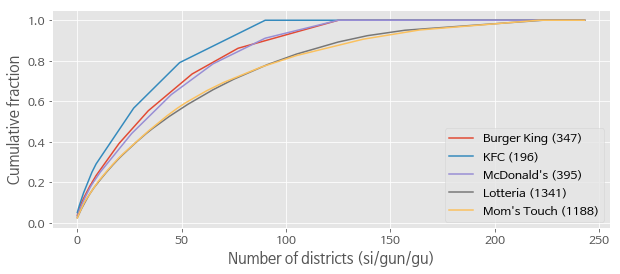

In [15]:
plt.figure(figsize=(10, 4))
for col, label in [('B', 'Burger King'), ('K', 'KFC'), ('M', "McDonald's"), ('L', "Lotteria"), ('MS', "Mom's Touch")]:
    cumulv = np.cumsum(sorted(BMKLS[col], reverse=True)) / BMKLS[col].sum()
    plt.plot(cumulv, label='{} ({})'.format(label, int(BMKLS[col].sum())))
plt.legend(loc='best')
plt.xlabel('Number of districts (si/gun/gu)')
plt.ylabel('Cumulative fraction')

In [16]:
from sklearn import manifold

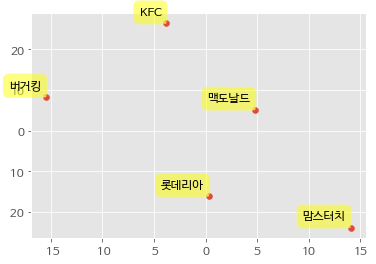

In [20]:
bgbrands = [
    ('B', '버거킹'), ('K', 'KFC'),
    ('M', '맥도날드'), ('L', '롯데리아'), ('MS', '맘스터치'),
]
totalList = []
tempList= None
for a in range(len(bgbrands)):
    tempList=[]
    tempList.append(bgbrands[a][1])
    for b in range(len(bgbrands)):
        acol, alabel = bgbrands[a]
        bcol, blabel = bgbrands[b]
        r = scipy.stats.pearsonr(BMKLS[bcol], BMKLS[acol])
        if r[0] == 1:
            tempList.append(0)
        else:
            tempList.append((1-r[0])*100)
    totalList.append(tempList)

dists = []
burgers = []
for d in totalList:
    burgers.append(d[0])
    dists.append(d[1:])

adist = np.array(dists)

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=5)
results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(burgers, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-5, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()